# Basic Statistics

In [8]:
library(tidyquant)
library(timetk)

getSymbols("JPM",
           from = "2018-02-01", 
           to = "2018-12-30", 
           src = "yahoo")

head(JPM)

JPM <- JPM[,"JPM.Adjusted"]

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”


[1] "JPM"

           JPM.Open JPM.High JPM.Low JPM.Close JPM.Volume JPM.Adjusted
2018-02-01   115.77   116.99  115.48    116.87   13800600     110.6600
2018-02-02   116.49   116.92  114.09    114.28   16477300     108.2076
2018-02-05   113.00   114.59  103.98    108.80   30097600     103.0188
2018-02-06   106.85   112.48  106.61    112.11   33114800     106.1529
2018-02-07   111.55   114.45  111.15    112.87   21878300     106.8725
2018-02-08   113.11   113.11  107.84    107.88   27425800     102.1477

## Average stock value

In [2]:
mean <- mean(JPM)
print(paste0('Average stock value:', mean))

[1] "Average stock value:105.67118490393"


## Stock return volatility

https://masters.wqu.org/mod/forum/discuss.php?d=14861

## Daily stock return

# Linear Regression: JMP with SP500

# Univariate Time Series

observation_date,CSUSHPISA
<dttm>,<dbl>
1987-01-01,63.988
1987-02-01,64.446
1987-03-01,64.760
1987-04-01,65.153
1987-05-01,65.583
1987-06-01,66.087


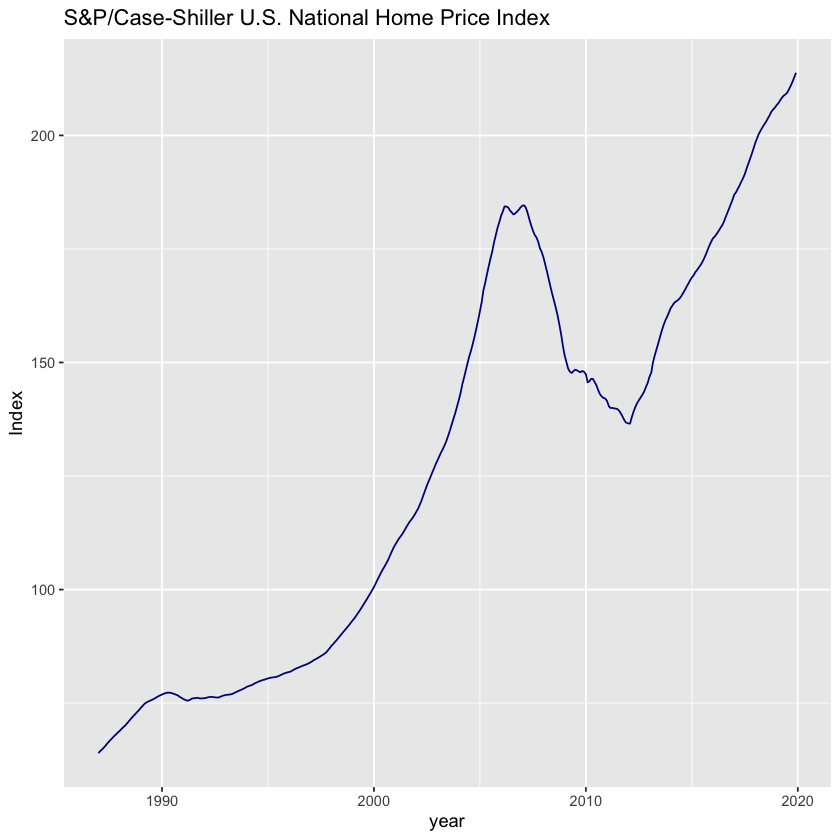

In [67]:
library(tidyverse)
library(stats)
library(readxl)
library(tseries)
library(forecast)

#load data
Index <- read_excel("/Users/jnsj/Desktop/Econometrics/Data/CSUSHPISA.xls", 
                        sheet = "FRED Graph",
                        col_names = T,
                        col_types = c("date", "numeric"),
                        skip = 10)
head(Index)

#plot data
ggplot(data = Index, aes(x=observation_date,y=CSUSHPISA))+ 
  geom_line(color ="darkblue") + 
  labs(title='S&P/Case-Shiller U.S. National Home Price Index',x="year",y="Index")

In [ ]:
# Convert the data frame to a time series object 
index <- ts(Index$CSUSHPISA,frequency=12)

## ADF Test for Case-Shiller Index Series

In [69]:
# ADF test
adf.test(index)


	Augmented Dickey-Fuller Test

data:  index
Dickey-Fuller = -3.1079, Lag order = 7, p-value = 0.1093
alternative hypothesis: stationary


p-value = 0.1093 > 0.1, we cannot reject the null hypothesis of the existenci of unit root, so the time series is non-stationary and need further transformation.

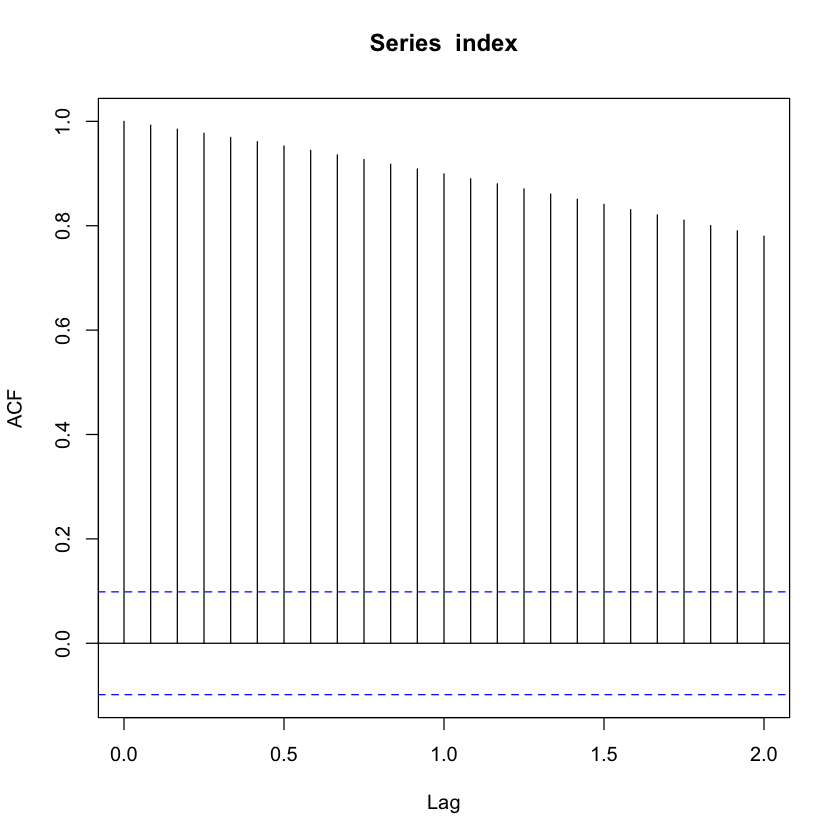

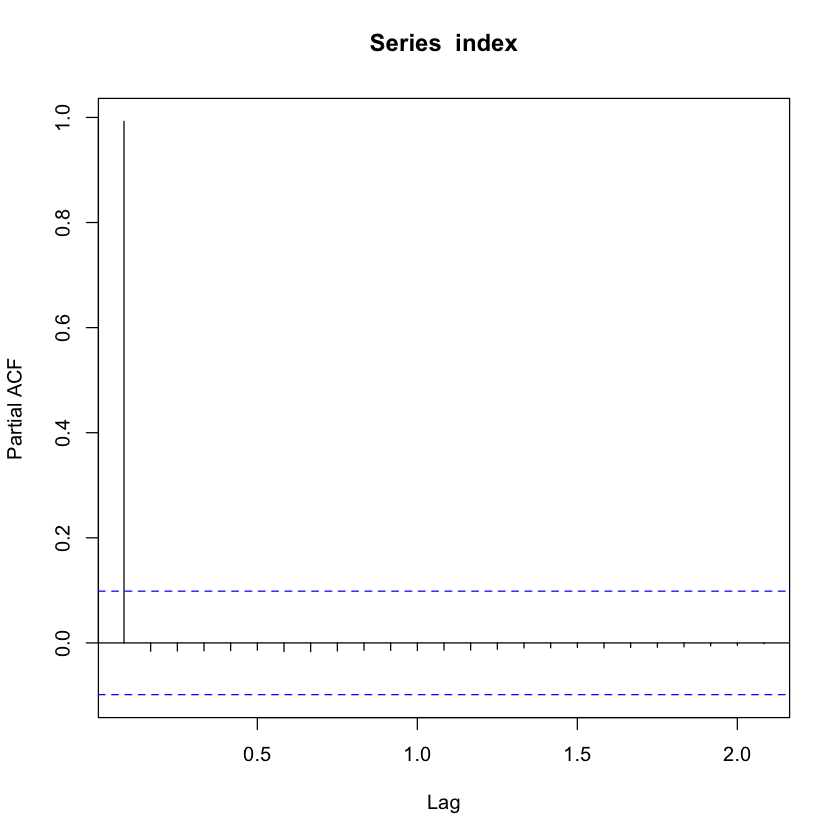

In [70]:
# plot ACF lag=24
acf(index,24)
pacf(index)

The ACF of the index variable is typical of a non-stationary process: auto-correlations are very close to 1 and slowly fade.        

To remove non-stationarity, apply difference to the series as below.


	Augmented Dickey-Fuller Test

data:  index_diff_1
Dickey-Fuller = -2.3366, Lag order = 7, p-value = 0.4351
alternative hypothesis: stationary


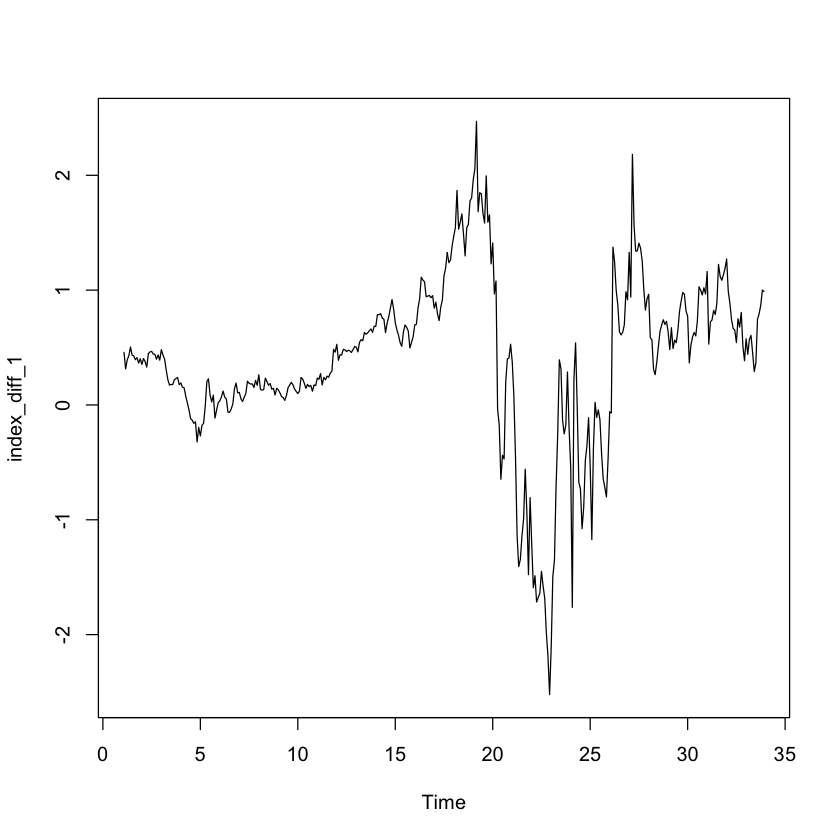

Warning message in adf.test(index_diff_2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  index_diff_2
Dickey-Fuller = -9.2773, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


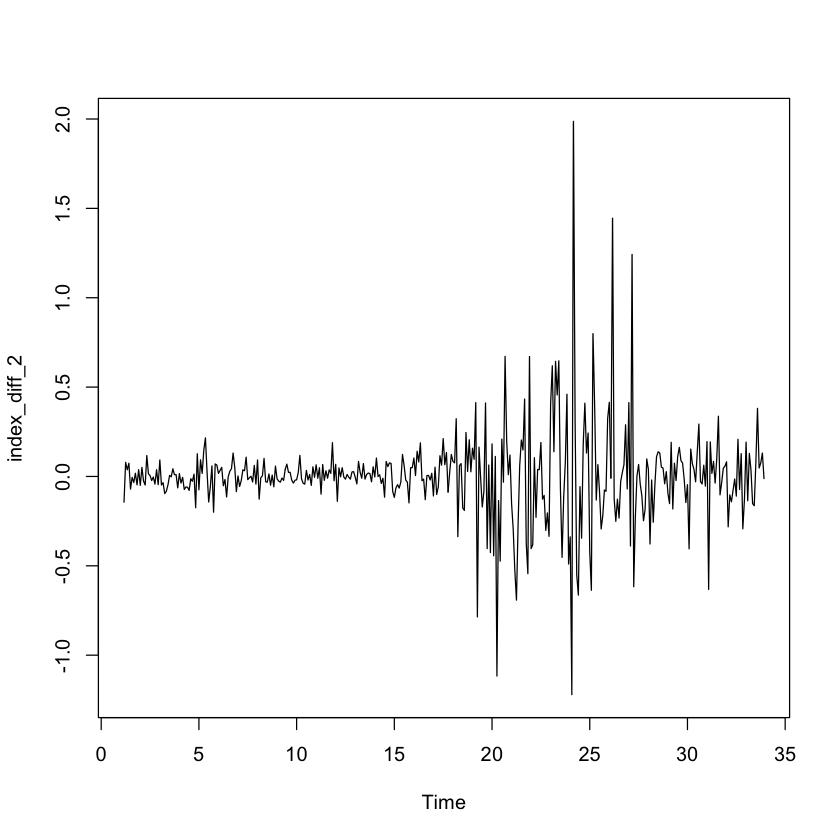

Warning message in adf.test(index_diff_3):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  index_diff_3
Dickey-Fuller = -13.315, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


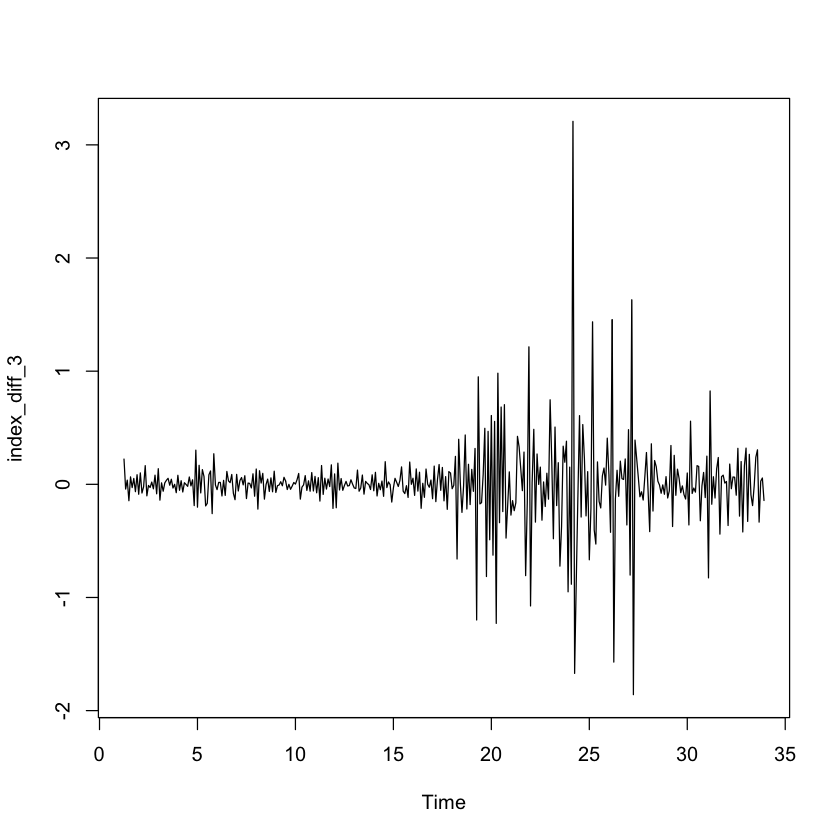

In [73]:
# differencing and ADF test
index_diff_1 <- diff(index,differences = 1)
plot(index_diff_1)
adf.test(index_diff_1)

index_diff_2 <- diff(index,differences = 2)
plot(index_diff_2)
adf.test(index_diff_2)

index_diff_3 <- diff(index,differences = 3)
plot(index_diff_3)
adf.test(index_diff_3)

Interpretation:   

when d=1, the ADF test of the index series cannot reject the hypothesis of a unit root at a 1% level of significance.  

when d=2 and d=3, the ADF test of the index series can reject the hypothesis of a unit root at a 1% level of significance.      

From these results we can choose d=2 or d=3.

## Implement an ARIMA(p,d,q) model

### decide d 

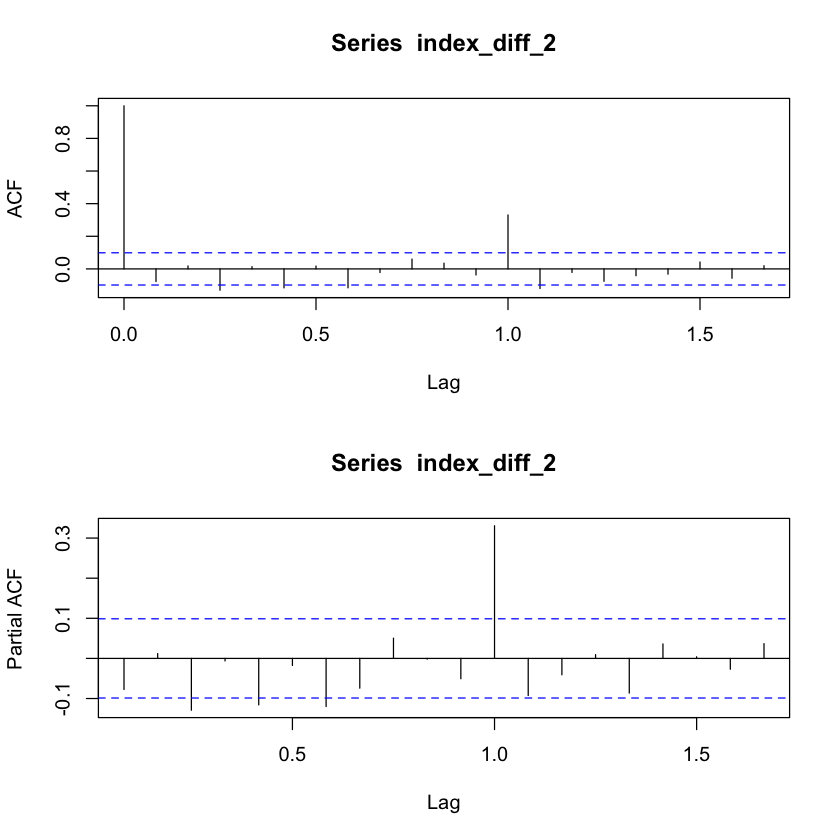

In [43]:
par(mfrow=c(2,1))
acf(index_diff_2,lag.max=20)
pacf(index_diff_2,lag.max=20)

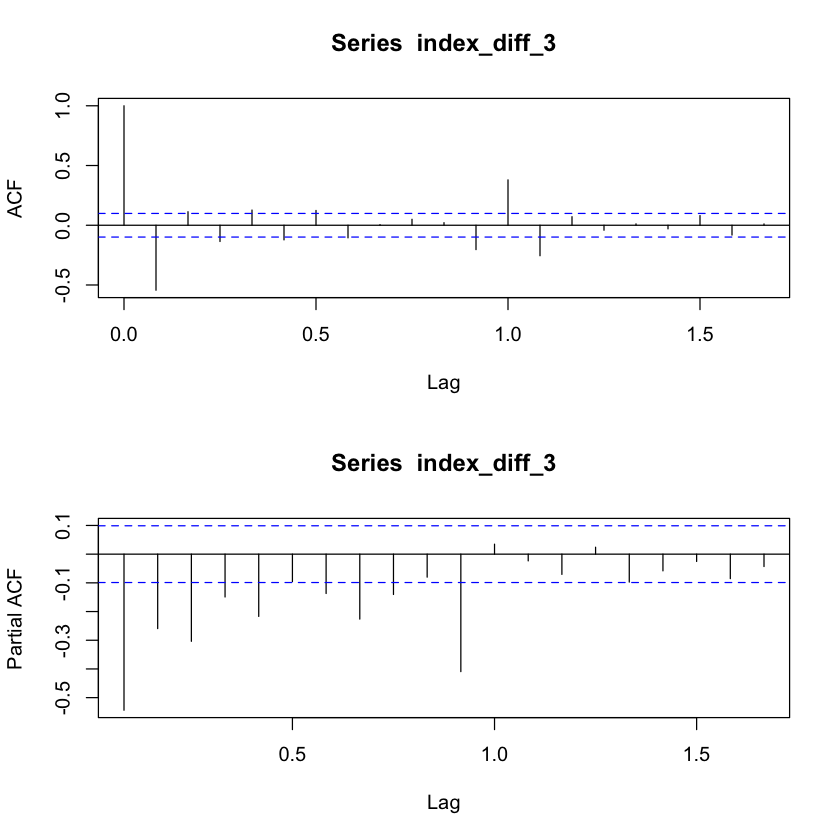

In [49]:
par(mfrow=c(2,1))
acf(index_diff_3,lag.max=20)
pacf(index_diff_3,lag.max=20)

index_diff_2 performs better, so we decide d=2.

### decide p, q

In [74]:
# first have a look of auto function
auto.arima(index)

Series: index 
ARIMA(3,1,2)(0,0,2)[12] with drift 

Coefficients:
          ar1     ar2     ar3     ma1     ma2    sma1    sma2   drift
      -0.4958  0.5764  0.6600  1.4517  0.8223  0.3141  0.1229  0.4055
s.e.   0.1598  0.0812  0.1079  0.1274  0.0791  0.0542  0.0465  0.2033

sigma^2 estimated as 0.05462:  log likelihood=15.88
AIC=-13.75   AICc=-13.29   BIC=22.06

Which suggest q=2, and we already found d=2, so we can check with different combination to find the lowest AIC.

In [75]:
am122<-arima(index,order=c(1,2,2))
am122


Call:
arima(x = index, order = c(1, 2, 2))

Coefficients:
          ar1     ma1      ma2
      -0.9932  0.9497  -0.0236
s.e.   0.0081  0.0536   0.0531

sigma^2 estimated as 0.06219:  log likelihood = -12.09,  aic = 32.19

In [79]:
am221<-arima(index,order=c(2,2,1))
am221


Call:
arima(x = index, order = c(2, 2, 1))

Coefficients:
          ar1      ar2     ma1
      -1.0155  -0.0220  0.9741
s.e.   0.0532   0.0515  0.0175

sigma^2 estimated as 0.06219:  log likelihood = -12.1,  aic = 32.2

In [81]:
am222<-arima(index,order=c(2,2,2))
am222


Call:
arima(x = index, order = c(2, 2, 2))

Coefficients:
          ar1     ar2     ma1      ma2
      -0.2131  0.7745  0.1168  -0.8351
s.e.   0.1176  0.1162  0.0975   0.0932

sigma^2 estimated as 0.06128:  log likelihood = -9.21,  aic = 28.42

In [77]:
am321<-arima(index,order=c(3,2,1))
am321


Call:
arima(x = index, order = c(3, 2, 1))

Coefficients:
         ar1     ar2      ar3      ma1
      0.6131  0.0556  -0.1226  -0.7063
s.e.  0.1296  0.0596   0.0528   0.1232

sigma^2 estimated as 0.06263:  log likelihood = -13.33,  aic = 36.67

In [78]:
am123<-arima(index,order=c(1,2,3))
am123


Call:
arima(x = index, order = c(1, 2, 3))

Coefficients:
         ar1      ma1     ma2      ma3
      0.4980  -0.5866  0.0279  -0.1163
s.e.  0.2201   0.2234  0.0620   0.0554

sigma^2 estimated as 0.06277:  log likelihood = -13.75,  aic = 37.5

In [80]:
am121<-arima(index,order=c(1,2,1))
am121


Call:
arima(x = index, order = c(1, 2, 1))

Coefficients:
          ar1     ma1
      -0.9928  0.9721
s.e.   0.0085  0.0184

sigma^2 estimated as 0.06222:  log likelihood = -12.19,  aic = 30.39

After comparison, we find model ARIMA(2,2,2) has lowest AIC=28.42，so becoming the best fit.

## Forecast Index using the ARMA model

### ARIMA(2,2,2)

In [94]:
index_fit<-arima(index,order = c(2,2,2))
index_fit


Call:
arima(x = index, order = c(2, 2, 2))

Coefficients:
          ar1     ar2     ma1      ma2
      -0.2131  0.7745  0.1168  -0.8351
s.e.   0.1176  0.1162  0.0975   0.0932

sigma^2 estimated as 0.06128:  log likelihood = -9.21,  aic = 28.42

### Evaluate the model

In [85]:
accuracy(index_fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.001581846,0.2469619,0.1412306,0.003182954,0.1019765,0.2169305,0.03883909


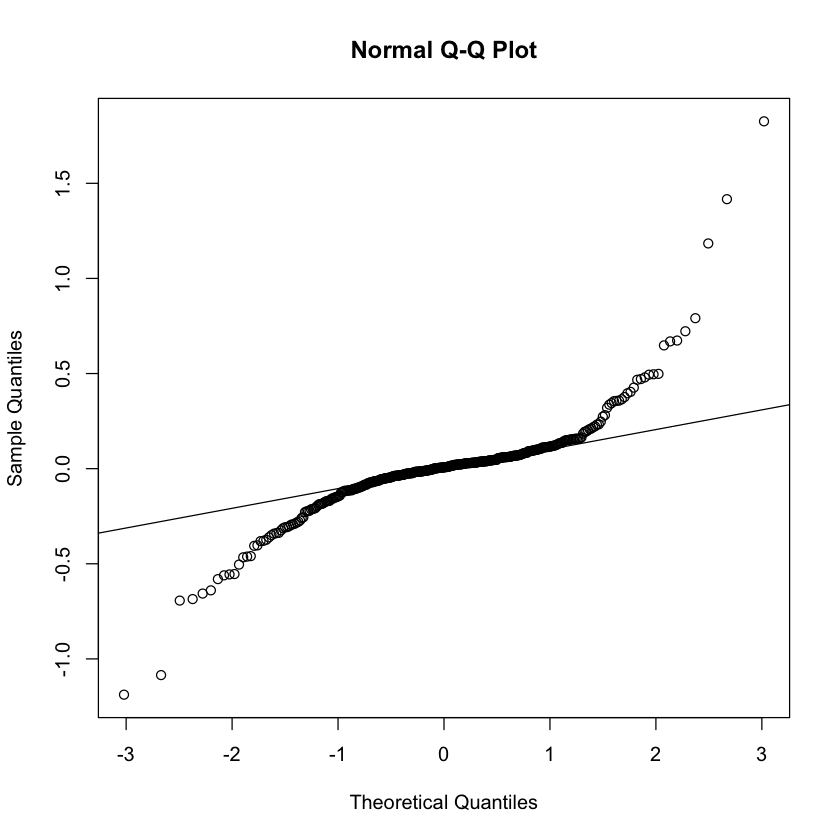

In [86]:
# test for residual's normality
qqnorm(index_fit$residuals)
qqline(index_fit$residuals) 

In [88]:
# test if residuals are white noise:
Box.test(index_fit$residuals)

# test for independence of residuals
Box.test(index_fit$residuals,type='Ljung-Box')


	Box-Pierce test

data:  index_fit$residuals
X-squared = 0.59736, df = 1, p-value = 0.4396



	Box-Ljung test

data:  index_fit$residuals
X-squared = 0.60189, df = 1, p-value = 0.4379


p-value = 0.4396 > 0.05，we accept the null hypothesis of white noise errors.     

p-value = 0.4379 > 0.05, we accept the null hypothesis of independent residuals.   

As a result, ARIMA(2,2,2) model fits this time series successfully.

### Forecasting

In [102]:
index_forecast <- predict(index_fit,n.ahead=72,se.fit=TRUE)

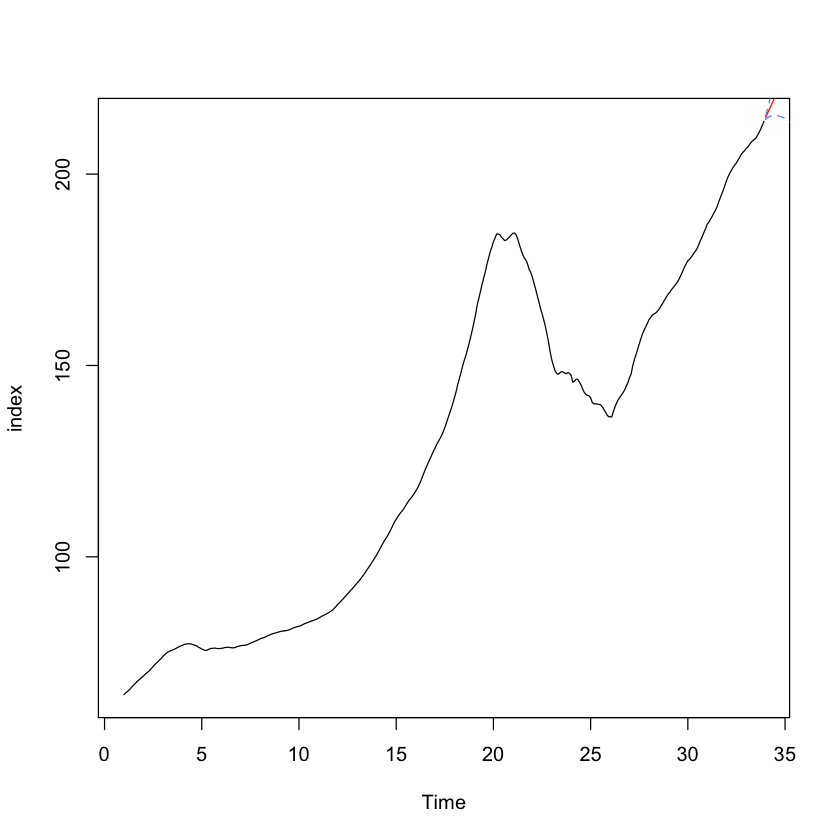

In [103]:
# plot the predicted values along with our uncertainty about those forecasts

plot(index)
     
lines(index_forecast$pred,col="red")
     
lines(index_forecast$pred+2*index_forecast$se, col="cornflowerblue", lty= "dashed")
     
lines(index_forecast$pred-2*index_forecast$se, col="cornflowerblue", lty= "dashed")

In [117]:
# get errot this way,don't know why, can anybody help?

index_fit <- arima(window(index,start=2000,end=2010),
                   order = c(2,2,2))

index_forecast <- predict(index_fit,n.ahead=72,se.fit=TRUE)

# plot the predicted values along with our uncertainty about those forecasts

plot(window(index,start=2000))
     
lines(index_forecast$pred,col="red")
     
lines(index_forecast$pred+2*index_forecast$se, col="cornflowerblue", lty= "dashed")
     
lines(index_forecast$pred-2*index_forecast$se, col="cornflowerblue", lty= "dashed")

Warning message in window.default(x, ...):
“'end' value not changed”


ERROR: Error in window.default(x, ...): 'start' cannot be after 'end'
